In [4]:
## 1. Download Apple Stock Data using yfinance
import yfinance as yf

ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-03-1'

# Download the stock data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925629,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582672,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750259,132079200


/var/folders/pl/p4rmmt_j6yb7blr7t676_kph0000gn/T/ipykernel_92005/2266774599.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'], bins=30)


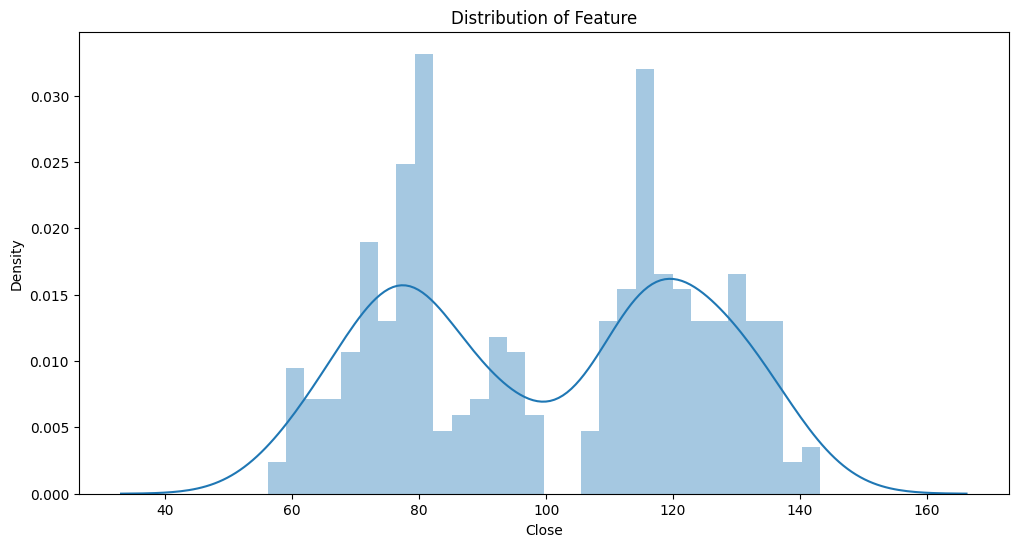

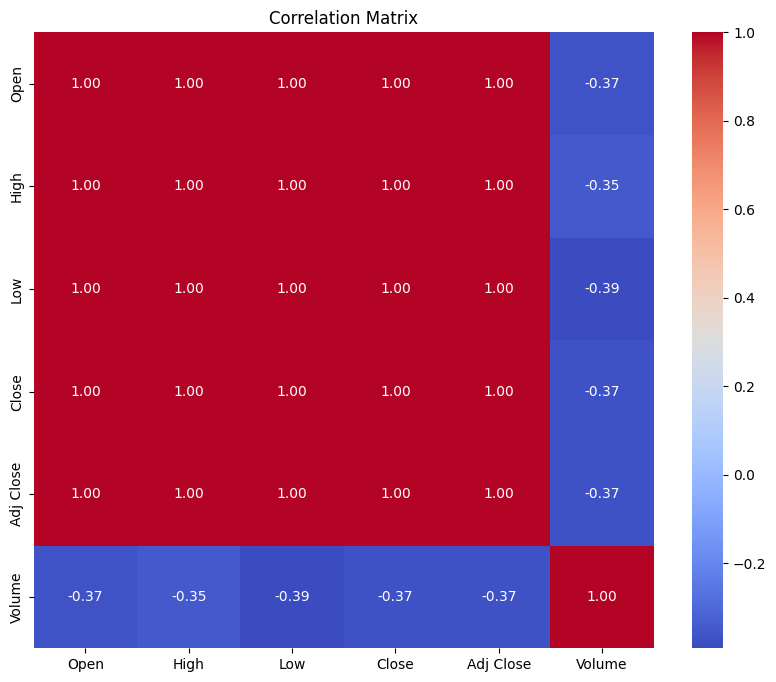

In [8]:
import matplotlib.pyplot as plt
## Exploratory Data Analysis (EDA)
import seaborn as sns
# Plotting the distribution of features
plt.figure(figsize=(12, 6))
sns.distplot(df['Close'], bins=30)
plt.title('Distribution of Feature')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


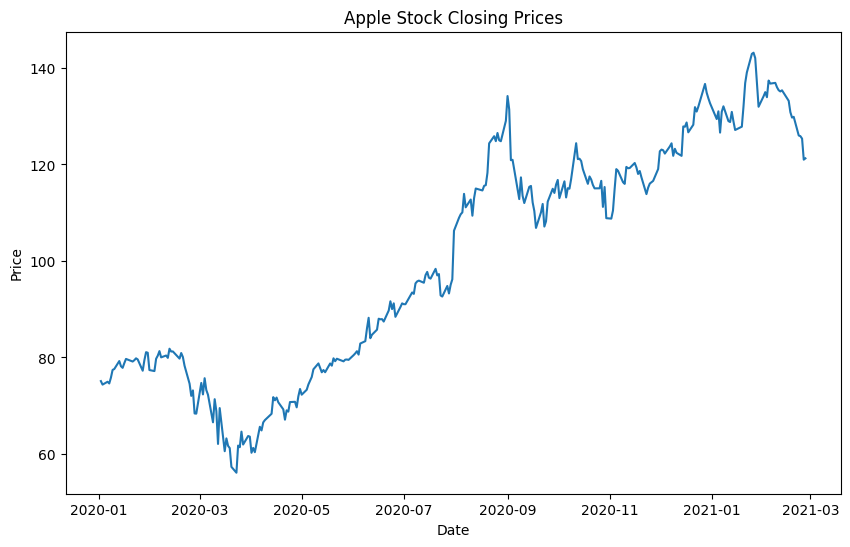

             Open        High         Low       Close   Adj Close  \
count  291.000000  291.000000  291.000000  291.000000  291.000000   
mean   100.137698  101.546486   98.684527  100.170481   98.057737   
std     24.146867   24.227884   23.670557   23.925393   23.657539   
min     57.020000   57.125000   53.152500   56.092499   54.707001   
25%     78.651249   79.614998   77.904999   78.746250   76.842178   
50%     99.172501   99.955002   96.742500   98.357498   96.187706   
75%    120.430000  122.810001  118.884998  120.919998  118.465683   
max    143.600006  145.089996  141.369995  143.160004  140.496262   

             Volume  
count  2.910000e+02  
mean   1.509896e+08  
std    6.813759e+07  
min    4.669130e+07  
25%    1.041180e+08  
50%    1.338384e+08  
75%    1.772322e+08  
max    4.265100e+08  


In [9]:

## 2. Perform Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Display basic statistics
print(df.describe())


In [10]:
# Manual split based on the specific date ranges
train_df = df.loc['2020-01-01':'2021-01-01']
test_df = df.loc['2021-01-02':'2021-02-01']
# Validation set, in case you need it later
validation_df = df.loc['2021-02-02':'2021-03-01']

# training based on close price
X_train = train_df[['Close']]
y_train = train_df['Close'].shift(-1) # Predict next day's close for the training set
X_train = X_train[:-1] # Remove last row which has no next day's close for the training set
y_train = y_train.dropna() # Remove last NA value from the training set

X_test = test_df[['Close']]
y_test = test_df['Close'].shift(-1) # Predict next day's close for the test set
X_test = X_test[:-1] # Remove last row which has no next day's close for the test set
y_test = y_test.dropna() # Remove last NA value from the test set

In [11]:
# Ensure that 'df' is sorted by date if it's not already
df = df.sort_index()

# Define your date ranges for training and testing
train_start, train_end = '2020-01-01', '2021-01-01'
test_start, test_end = '2021-01-02', '2021-02-01'
validation_start, validation_end = '2021-02-02', '2021-03-01'

train_df = df.loc[train_start:train_end].copy()
test_df = df.loc[test_start:test_end].copy()
validation_df = df.loc[validation_start:validation_end].copy()

# Feature and target creation
# Using 'Close' price for today to predict 'Close' price for the next day
# Shift creates a new column where each value is the 'Close' price of the next day
train_df['Target'] = train_df['Close'].shift(-1)
test_df['Target'] = test_df['Close'].shift(-1)
validation_df['Target'] = validation_df['Close'].shift(-1)


# Drop the last row in each set because it does not have a next day 'Close' price
train_df = train_df.iloc[:-1]
test_df = test_df.iloc[:-1]
validation_df = validation_df.iloc[:-1]

# Define features and labels for training and testing
X_train, y_train = train_df[['Close']], train_df['Target']
X_test, y_test = test_df[['Close']], test_df['Target']
X_validation, y_validation = validation_df[['Close']], validation_df['Target']


In [15]:
## 4. Train an XGBoost Model
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


NameError: name 'model' is not defined

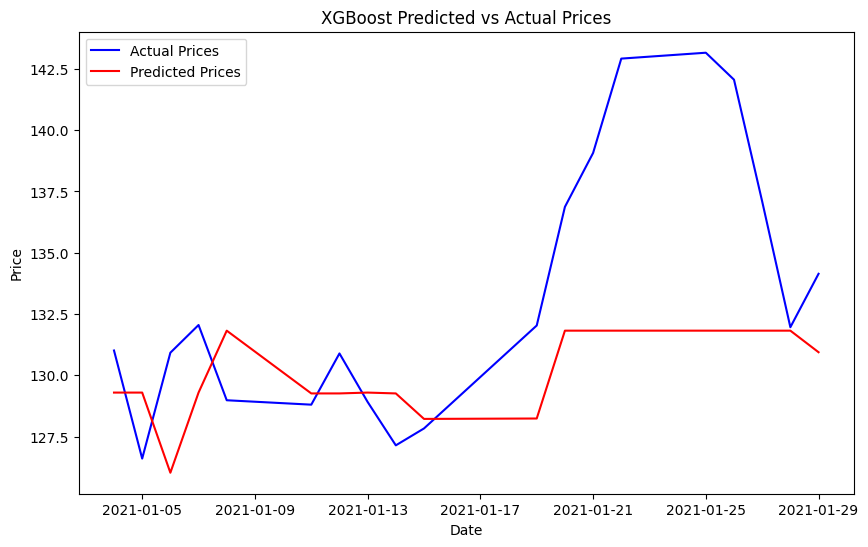

In [16]:
import matplotlib.pyplot as plt

y_pred = xgb_model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('XGBoost Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


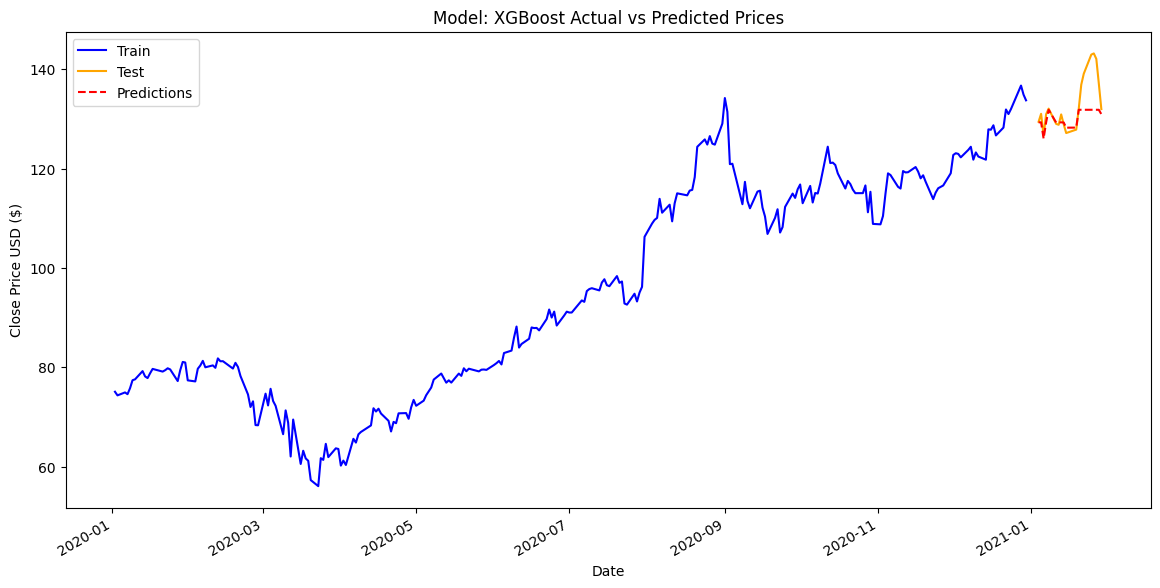

In [17]:
import matplotlib.pyplot as plt

# Plot the actual closing prices for the training set, the test set, and overlay the predictions
plt.figure(figsize=(14, 7))  # Set the size of the plot
plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')  # Training data in blue
plt.plot(test_df.index, test_df['Close'], label='Test', color='orange')  # Test data in orange
plt.plot(test_df.index, y_pred, label='Predictions', color='red', linestyle='--')  # Predictions in red dashed line

# Add title and labels
plt.title('Model: XGBoost Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

# Show legend
plt.legend()

# Optionally, you can format the x-axis to show dates better
plt.gcf().autofmt_xdate()  # Rotate the
